In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/charge_surface/py_files')
from flatQuenchedBrush import flatQuenchedBrush
from create_in import create_in
from out_reader import out_reader
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

In [2]:
N = 300

S_namics = 150

alpha = 0.5

Cs = 0.001
surf_val_values = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

chi = 0.5
chi_surf = -0.3

In [3]:
profiles = {}
for val in surf_val_values:
    # Создать SCF файл
    file_name_pro = create_in(
    template_surf_charge='/home/tpopova/prj/PB_SCF/charge_surface/scf_templates/flat_brush_surf.in',
    range_param='val',
    min_val=0.1,
    max_val=0.1,
    Cs=Cs,
    chi=chi,
    chi_surf=chi_surf,
    N_layers=N,
    N=N,
    S=S_namics,
    alpha=alpha,
    surf_val=val
    )

    # парсим профили
    psi, phi_brush, phi_end_brush = out_reader(file_names = file_name_pro)
    
    coord = np.arange(N)
    
    profiles[val] = (coord, phi_end_brush)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.315377e+00 |g| = 6.222517e+00 alpha = 1.000000e+00 
hessian scaling: 1.36115
it =  1  E = 2.075737e+00 |g| = 5.501232e+00 alpha = 1.160707e-01 
it =  2  E = 2.537748e+00 |g| = 6.257406e+00 alpha = 8.305447e-02 
it =  3  E = 8.802951e+00 |g| = 6.801195e+00 alpha = 8.062682e-03 
it =  4  E = 8.495564e+00 |g| = 6.481663e+00 alpha = 8.526607e-03 
it =  5  E = 6.433370e+00 |g| = 6.497766e+00 alpha = 1.426931e-02 
it =  6  E = 7.244819e+00 |g| = 6.516441e+00 alpha = 1.053155e-02 
it =  7  E = 7.560617e+00 |g| = 6.251305e+00 alpha = 8.634895e-03 
it =  8  E = 1.199635e+01 |g| = 6.168118e+00 alpha = 3.666483e-03 
it =  9  E = 7.713081e+00 |g| = 6.104459e+00 alpha = 8.115478e-03 
it =  10  E = 9.777282e+00 |g| = 6.051924e+00

In [4]:
if len(profiles) > 1:
    keys = list(profiles.keys())  # Получаем список ключей
    key_to_remove = keys[-2]  # Предпоследний ключ
    del profiles[key_to_remove]  # Удаляем его

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2201396/1772346073.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi(z)$", fontsize=18, labelpad=10)
/tmp/ipykernel_2201396/1772346073.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")  # используем карту цветов "plasma"


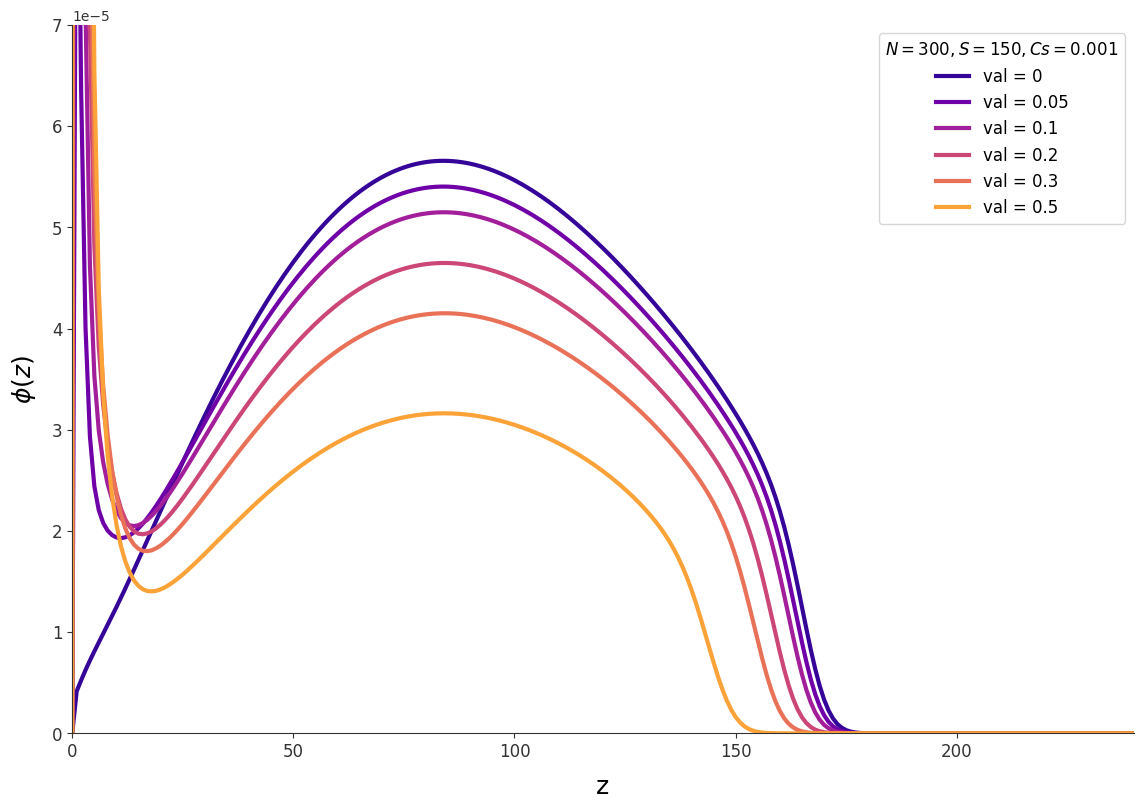

In [5]:
# Построение графиков
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")  # используем карту цветов "plasma"

for i, (val, (coord, phi_end_brush)) in enumerate(profiles.items()):
    color1 = color_map((i + 0.5) / len(surf_val_values))  # плавные цвета для phi_end_brush
    plt.plot(coord, phi_end_brush, label=f"val = {val}", linewidth=3, color=color1, linestyle="-")

# Настройка визуализации
plt.xlabel("z", fontsize=18, labelpad=10)
plt.ylabel("$\phi(z)$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title=f"$N = {N}, S = {S_namics}, Cs = {Cs}$", title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.ylim(0, 0.00007)
plt.xlim(0, 240)

# plt.xticks(np.arange(0, N+1, step=50), fontsize=14)  # редкие метки по X через каждые 50
# plt.yticks(fontsize=14)  # увеличение шрифта для меток по Y

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
plt.savefig('end_dist_var_val.pdf', dpi=300, bbox_inches='tight')
plt.show()
